<a href="https://colab.research.google.com/github/Deepanivasini/Customer_Lifetime_prediction/blob/main/CLTV_AnalyticsVidya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Lifetime Prection**

###  **Libraries**

1.   Pandas
1.   matplotlib
3.   seaborn
4.   scikit-learn

### **Algorithms**


1.   Linear Regression
2.   Huber Regression
3.   Lasso Regression
4.   Ridge Regression
5.   Decision Tree Regression
6.   Random Forest Regression
7.   Ordinary Least Sqaures
8.   Extra Tree Regression














## Training data

In [7]:
import pandas as pd
train=pd.read_csv("/content/train_BRCpofr.csv")
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [8]:
#We count the number of missing values for each feature
train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [9]:
train.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [10]:
train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


## Test Data

In [11]:
test=pd.read_csv("/content/test_koRSKBP.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


In [12]:
#We count the number of missing values for each feature
test.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

In [13]:
test.describe()

,id,marital_status,vintage,claim_amount
count,59595.000000,59595.000000,59595.000000,59595.000000
mean,119190.000000,0.576928,4.620304,4368.504321
std,17203.738983,0.494051,2.282511,3288.132408
min,89393.000000,0.000000,0.000000,0.000000
25%,104291.500000,0.000000,3.000000,2398.000000
50%,119190.000000,1.000000,5.000000,4106.000000
75%,134088.500000,1.000000,6.000000,6104.000000
max,148987.000000,1.000000,8.000000,32534.000000


In [14]:
test

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver


## Concatenating

In [15]:
train_len=len(train)
test_len=len(test)

In [16]:
#Concatenate both dataframes
df = pd.concat([train,test],axis=0)
df.reset_index(drop=True,inplace=True)
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308.0
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400.0
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212.0
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920.0
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736.0


In [17]:
df.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
148982,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver,NaN
148983,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold,NaN
148984,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum,NaN
148985,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver,NaN
148986,148987,Female,Urban,Bachelor,5L-10L,1,4,5939,More than 1,B,Platinum,NaN


In [18]:
print(len(train),len(test),len(df))

89392 59595 148987


In [19]:
import pandas as pd
train=pd.read_csv("/content/train_BRCpofr.csv")
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [20]:
#We count the number of missing values for each feature
train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [21]:
train.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [22]:
train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


## Data Preprocessing 


In [23]:
result = df

In [24]:
#Transoforming the gender in labelEncoding because it is a nominal variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
transformed_gender = le.fit_transform(df["gender"])
result=result.drop(["gender"],axis=1)
result["gender"] = transformed_gender

In [25]:
#Transoforming the area in labelEncoding because it is nominal variable
le = LabelEncoder()
transformed_area = le.fit_transform(df["area"])
result=result.drop(["area"],axis=1)
result["area"] = transformed_area

In [26]:
#Transoforming the area in labelEncoding because it is nominal variable
le = LabelEncoder()
transformed_area = le.fit_transform(df["income"])
result=result.drop(["income"],axis=1)
result["income"] = transformed_area

In [27]:
#Transoforming the num_policy in labelEncoding because it is nominal variable
le = LabelEncoder()
transformed_area = le.fit_transform(df["num_policies"])
result=result.drop(["num_policies"],axis=1)
result["num_policies"] = transformed_area

In [28]:
#Transoforming the policy in labelEncoding because it is nominal variablepolicy
le = LabelEncoder()
transformed_area = le.fit_transform(df["policy"])
result=result.drop(["policy"],axis=1)
result["policy"] = transformed_area

In [29]:
#Transoforming the type_of_policy in integer encoding because it is ordinal variable
datamapping={ "Silver":0,"Gold":1,"Platinum":2}
result=result.drop(["type_of_policy"],axis=1)
result["type_of_policy"]=df["type_of_policy"].map(datamapping)


In [30]:
#Transoforming the qualification in integer encoding because it is ordinal variable
datamapping={ "High School":0,"Bachelor":1,"Others":2}
result=result.drop(["qualification"],axis=1)
result["qualification"]=df["qualification"].map(datamapping)

In [31]:
result

,id,marital_status,vintage,claim_amount,cltv,gender,area,income,num_policies,policy,type_of_policy,qualification
0,1,1,5,5790,64308.0,1,1,1,1,0,2,1
1,2,0,8,5080,515400.0,1,0,1,1,0,2,0
2,3,1,8,2599,64212.0,1,1,1,1,0,2,1
3,4,0,7,0,97920.0,0,0,1,1,0,2,0
4,5,1,6,3508,59736.0,1,1,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
148982,148983,1,6,0,NaN,1,0,1,0,0,0,1
148983,148984,0,6,0,NaN,1,1,1,0,2,1,0
148984,148985,1,4,3323,NaN,0,1,0,1,1,2,0
148985,148986,0,1,2886,NaN,1,0,1,1,0,0,1


## Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


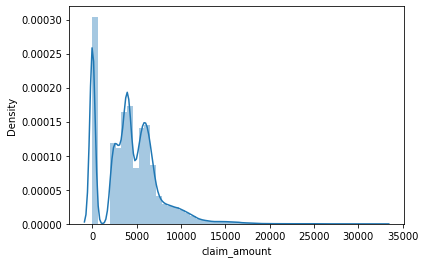

In [32]:
import seaborn as sns
sns.distplot(result['claim_amount'])

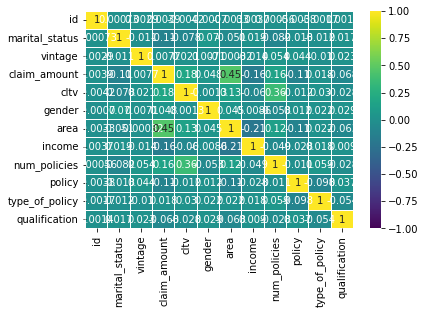

In [33]:
result_cor = result.corr()
sns.heatmap(result_cor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

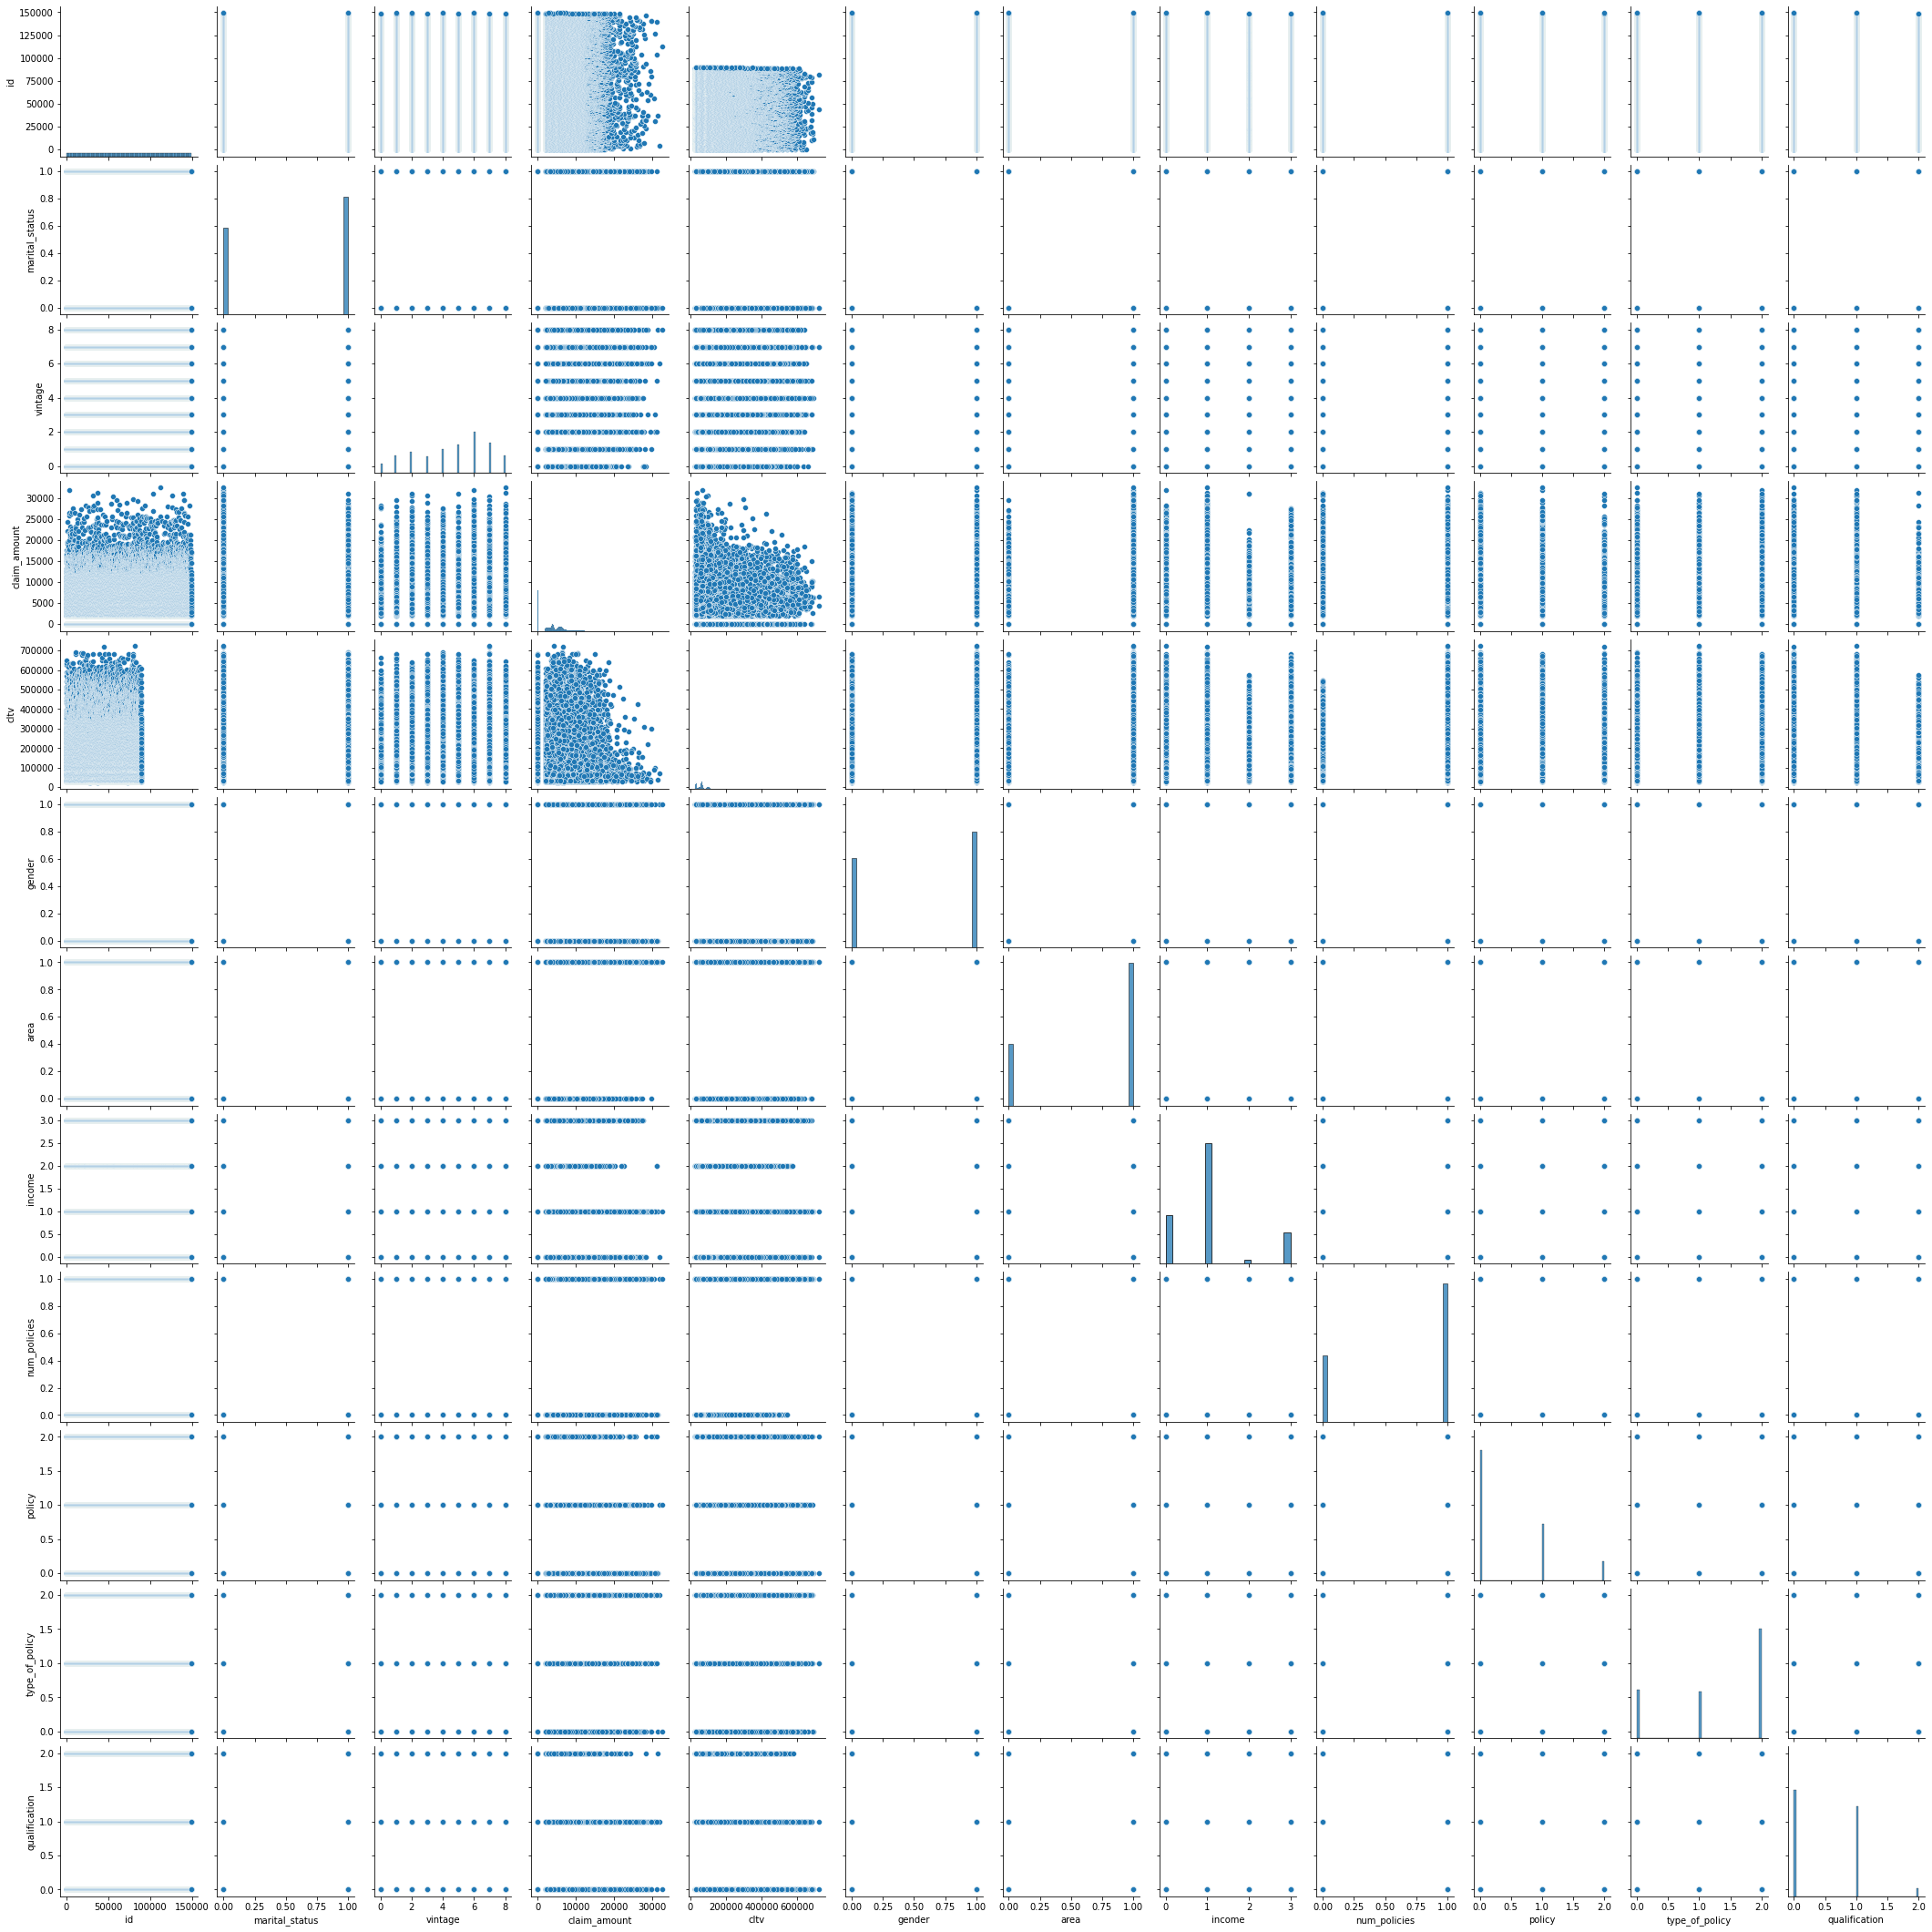

In [34]:
import seaborn
import matplotlib.pyplot as plt
  
seaborn.pairplot(result,palette='Dark2')
# to show
plt.show()

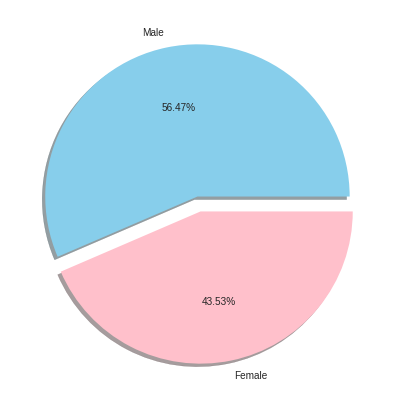

In [35]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))
plt.pie(x=result["gender"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

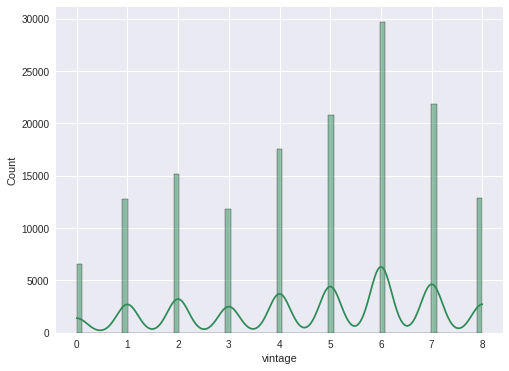

In [36]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(result["vintage"], kde=True, color="seagreen");

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


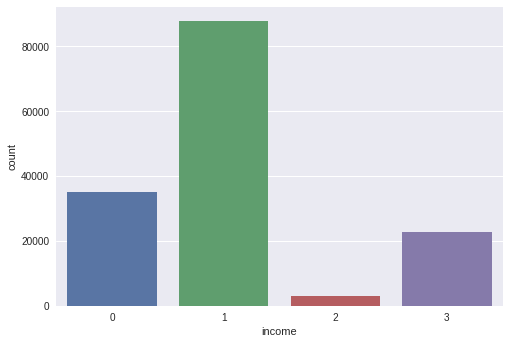

In [37]:
sns.countplot(result["income"])

## Input Split

In [38]:
train = result.iloc[:train_len,:]
test = result.iloc[train_len:,:]

In [39]:
train.head()

,id,marital_status,vintage,claim_amount,cltv,gender,area,income,num_policies,policy,type_of_policy,qualification
0,1,1,5,5790,64308.0,1,1,1,1,0,2,1
1,2,0,8,5080,515400.0,1,0,1,1,0,2,0
2,3,1,8,2599,64212.0,1,1,1,1,0,2,1
3,4,0,7,0,97920.0,0,0,1,1,0,2,0
4,5,1,6,3508,59736.0,1,1,3,1,0,1,0


In [40]:
test = test.drop(['cltv'],axis=1)
test.head()

,id,marital_status,vintage,claim_amount,gender,area,income,num_policies,policy,type_of_policy,qualification
89392,89393,0,6,2134,0,0,1,1,1,0,0
89393,89394,0,4,4102,0,1,0,1,0,2,0
89394,89395,1,7,2925,1,0,1,1,1,1,0
89395,89396,1,2,0,0,0,3,1,1,0,1
89396,89397,0,5,14059,0,1,0,1,1,0,0


In [41]:
X = train.drop(['cltv','id'],axis=1)
Y = train['cltv']

## Calculation Metrices

In [42]:
def train(y,pre_y):
  m=len(y)
  #Calculation the Model Performance for MultiLinear Regression
  #R_Squared

  from sklearn.metrics import r2_score
  r2 = r2_score(y, pre_y)
  print('r2 score for perfect model is', r2)

  #Mean Squared Error
  from sklearn.metrics import mean_squared_error
  mse=mean_squared_error(y, pre_y)
  print(f"Mean Squared Error: {mse}")

  #Root mean square error
  rmse=np.sqrt(mse)
  print(f"Root mean square error: {rmse}")

  #Mean Absolute Error
  from sklearn.metrics import mean_absolute_error
  mae = mean_absolute_error(y, pre_y)
  print(f"Mean Absolute Error: {mae}")

  #Mean Absolute Percentage Error
  def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

  LR_MAPE= MAPE(y, pre_y)
  print("Mean Absolute Percentage Error: ",LR_MAPE)

  #Teil's U Statistic
  def u1(f,y):
      # y = y.reset_index(drop=True).values.flatten()
      # f = f.reset_index(drop=True).values.flatten()
      df = pd.DataFrame({'f_i':f, 'y_i': y})
      df['(f_i - y_i)^2'] = np.square(df['f_i'] - df['y_i'])
      df['y_i^2'] = np.square(df['y_i'])
      df['f_i^2'] = np.square(df['f_i'])
      return (np.sqrt(np.mean(df['(f_i - y_i)^2'])))/(np.sqrt(np.mean(df['y_i^2']))+np.sqrt(np.mean(df['f_i^2'])))

  U1= u1(y,pre_y)
  print("Theil's U1 Statistic: ",U1)

  def u2(f,y):
      # y = y.reset_index(drop=True).values.flatten()
      # f = f.reset_index(drop=True).values.flatten()
      df = pd.DataFrame({'f_i+1':f, 'y_i+1': y})
      df['y_i'] = df['y_i+1'].shift(periods=1)
      df['numerator'] = np.square((df['f_i+1'] - df['y_i+1']) / df['y_i'])
      df['denominator'] = np.square((df['y_i+1'] - df['y_i']) / df['y_i'])
      df.dropna(inplace=True)
      return np.sqrt(np.sum(df['numerator'])/np.sum(df['denominator']))

  U2= u2(y,pre_y)
  print("Theil's U2 Statistic: ",U2)

## Model Training

In [43]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from numpy import math
import numpy as np

### Linear Regression

Y-intercept : 39887.319720808824
Slope : [-6.71228494e+03  7.08646758e+01  2.84871742e+00  2.20530173e+03
  7.83174967e+03 -1.89631430e+03  6.48920046e+04  8.49786238e+02
  8.08530061e+02 -1.20150593e+03]
Predicted Value :  [123471.72788415 121743.77374273 114594.06461825 ... 121843.79547829
 107813.08804881 104966.51433624]


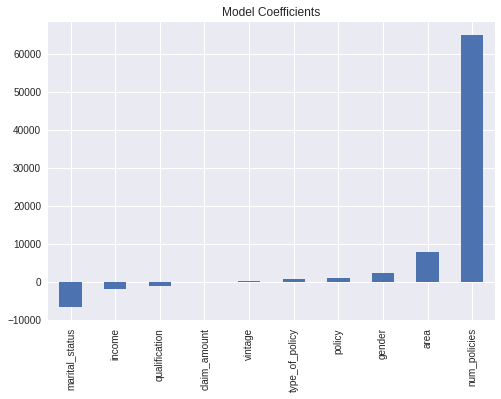

In [44]:
#LinearRegression
reg = LinearRegression()
reg_model=reg.fit(X,Y)
Y_pred = reg_model.predict(X)
print("Y-intercept :" , reg.intercept_)
print("Slope :" , reg.coef_)
print("Predicted Value : ",Y_pred)
coef = pd.Series(reg_model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")


In [45]:
train(Y,Y_pred)

r2 score for perfect model is 0.1491425870962183
Mean Squared Error: 6986195863.713912
Root mean square error: 83583.46644949533
Mean Absolute Error: 51486.1053689578
Mean Absolute Percentage Error:  56.4312649885076
Theil's U1 Statistic:  0.3519994848919437
Theil's U2 Statistic:  1.3933908222331808


### Huber Regression

In [46]:
#HuberRegression
from sklearn.linear_model import HuberRegressor
huber_reg=HuberRegressor()
#fitting training data
huber_reg.fit(X, Y)
print("Y-intercept :" , huber_reg.intercept_)
print("Slope :" , huber_reg.coef_)
print("\n")
#Y prediction
huber_pred=reg.predict(X)
print("Y_Predicted Values : ")
huber_pred

Y-intercept : 18807.157769435926
Slope : [1.99372200e+03 9.59156909e+02 1.44032405e+00 2.13437542e+03
 6.93313638e+03 1.83336777e+03 4.25144719e+04 3.15107897e+03
 2.24830132e+03 2.56583973e+03]


Y_Predicted Values : 


array([123471.72788415, 121743.77374273, 114594.06461825, ...,
       121843.79547829, 107813.08804881, 104966.51433624])

In [47]:
train(Y,huber_pred)

r2 score for perfect model is 0.1491425870962183
Mean Squared Error: 6986195863.713912
Root mean square error: 83583.46644949533
Mean Absolute Error: 51486.1053689578
Mean Absolute Percentage Error:  56.4312649885076
Theil's U1 Statistic:  0.3519994848919437
Theil's U2 Statistic:  1.3933908222331808


### Lasso Regression

In [48]:
#LassoRegression
from sklearn.linear_model import Ridge, Lasso
lasso_model = Lasso().fit(X,Y)
print("Lasso Intercept : ",lasso_model.intercept_)
print("Lasso Slope : ",lasso_model.coef_)
lasso_pred=lasso_model.predict(X)
print("preicted values :", lasso_pred)

Lasso Intercept :  39892.82755971144
Lasso Slope :  [-6.70817057e+03  7.07435341e+01  2.84927237e+00  2.20076308e+03
  7.82634182e+03 -1.89561500e+03  6.48879080e+04  8.47188886e+02
  8.07209318e+02 -1.19862404e+03]
preicted values : [123470.85421249 121740.55422228 114591.05668185 ... 121839.5230107
 107808.29138639 104963.97999957]


In [49]:
train(Y,lasso_pred)

r2 score for perfect model is 0.1491425839567604
Mean Squared Error: 6986195889.491284
Root mean square error: 83583.46660369671
Mean Absolute Error: 51485.62942725819
Mean Absolute Percentage Error:  56.43071278093953
Theil's U1 Statistic:  0.35200071770118385
Theil's U2 Statistic:  1.393547823055722


### Ridge Regression

In [50]:
#RidgeRegression
from sklearn.linear_model import Ridge, Lasso
Ridge_model = Ridge().fit(X,Y)
print("Lasso Intercept : ",Ridge_model.intercept_)
print("Lasso Slope : ",Ridge_model.coef_)
Ridge_pred=Ridge_model.predict(X)
print("preicted values :", Ridge_pred)

Lasso Intercept :  39889.253578911565
Lasso Slope :  [-6.71215687e+03  7.08997119e+01  2.84881469e+00  2.20499804e+03
  7.83144329e+03 -1.89635256e+03  6.48886018e+04  8.49778787e+02
  8.08636348e+02 -1.20151608e+03]
preicted values : [123470.67951547 121742.949879   114592.81096032 ... 121842.64416237
 107812.10453482 104965.3162057 ]


In [51]:
train(Y,Ridge_pred)

r2 score for perfect model is 0.14914258679026393
Mean Squared Error: 6986195866.226034
Root mean square error: 83583.46646452296
Mean Absolute Error: 51485.91929276431
Mean Absolute Percentage Error:  56.431334505107756
Theil's U1 Statistic:  0.35200017501229464
Theil's U2 Statistic:  1.393459302258208


### Decision Tree Regression

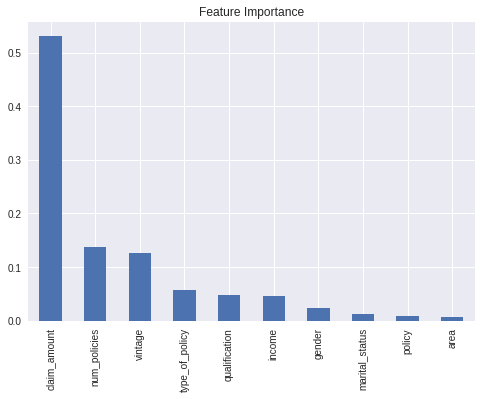

In [52]:
from sklearn.tree import DecisionTreeRegressor
Decision_model = DecisionTreeRegressor().fit(X,Y)
Dec_pred=Decision_model.predict(X)
Dec_pred
coef = pd.Series(Decision_model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [53]:
train(Y,Dec_pred)

r2 score for perfect model is 0.9395542172073686
Mean Squared Error: 496306515.4285542
Root mean square error: 22277.93786301942
Mean Absolute Error: 5098.452343370131
Mean Absolute Percentage Error:  6.423804705782612
Theil's U1 Statistic:  0.08406709594366742
Theil's U2 Statistic:  0.2076484991098006


### Ordinary Least Squares

In [54]:
import statsmodels.api as sm
X = sm.add_constant(X)
ols_model = sm.OLS(Y,X).fit()
ols_pred=ols_model.predict(X)
ols_pred


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0        123471.727884
1        121743.773743
2        114594.064618
3        104996.122835
4        113642.166669
             ...      
89387    104187.717526
89388    117724.782426
89389    121843.795478
89390    107813.088049
89391    104966.514336
Length: 89392, dtype: float64

In [55]:
train(Y,ols_pred)

r2 score for perfect model is 0.1491425870962183
Mean Squared Error: 6986195863.713912
Root mean square error: 83583.46644949533
Mean Absolute Error: 51486.10536895355
Mean Absolute Percentage Error:  56.431264988497254
Theil's U1 Statistic:  0.35199948489195887
Theil's U2 Statistic:  1.3933908222332367


### Random Forest Regression

In [56]:
from sklearn.ensemble import RandomForestRegressor
Random_model = RandomForestRegressor().fit(X,Y)
Random_pred=Random_model.predict(X)
Random_pred

array([ 79607.52      , 393904.92      ,  73989.84      , ...,
       112752.96      , 150608.28780952, 107832.86451222])

In [57]:
train(Y,Random_pred)

r2 score for perfect model is 0.8175435371843195
Mean Squared Error: 1498108339.3051708
Root mean square error: 38705.404523208
Mean Absolute Error: 23321.234706359686
Mean Absolute Percentage Error:  26.46982617347977
Theil's U1 Statistic:  0.15354612943969473
Theil's U2 Statistic:  0.4692373975911317


### Extra Tree Regression

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
Extra_model = ExtraTreesRegressor().fit(X,Y)
Extra_pred = Extra_model.predict(X)
Extra_pred 


array([ 64308.        , 515400.        ,  64212.        , ...,
       114120.        , 138864.        , 109682.66666667])

In [59]:
train(Y,Extra_pred)

r2 score for perfect model is 0.9395542172073686
Mean Squared Error: 496306515.4285542
Root mean square error: 22277.93786301942
Mean Absolute Error: 5098.452343370131
Mean Absolute Percentage Error:  6.423804705782614
Theil's U1 Statistic:  0.08406709594366742
Theil's U2 Statistic:  0.2076484991098006


## Prediction on test Data

In [60]:
X_test = test
X_test.head()

,id,marital_status,vintage,claim_amount,gender,area,income,num_policies,policy,type_of_policy,qualification
89392,89393,0,6,2134,0,0,1,1,1,0,0
89393,89394,0,4,4102,0,1,0,1,0,2,0
89394,89395,1,7,2925,1,0,1,1,1,1,0
89395,89396,1,2,0,0,0,3,1,1,0,1
89396,89397,0,5,14059,0,1,0,1,1,0,0


In [61]:
model = DecisionTreeRegressor()
random_model = model.fit(X,Y)

In [62]:
pred = random_model.predict(X_test)
pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- const

  warnings.warn(message, FutureWarning)


array([ 67414.28571429, 251640.        ,  65628.        , ...,
        96528.        ,  62844.        ,  67968.        ])

In [63]:
Final = pd.DataFrame()
Final['id'] = test["id"]
Final['CLTV']=pred
Final.head()


,id,CLTV
89392,89393,67414.285714
89393,89394,251640.000000
89394,89395,65628.000000
89395,89396,83844.000000
89396,89397,67452.000000


In [64]:
Final.to_csv('Result.csv',index=False)